<a href="https://colab.research.google.com/github/rigonzal/ML-2019-1/blob/master/Tarea1/Pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF-393: Máquinas de Aprendizaje
## Tarea 1 - Pregunta 1
### 26-04-2019


* Rodrigo González - 201303026-2
* Ignacio Valenzuela - 201473055-1


# Introducción

En esta primera parte de la tarea, se analizará un modelamiento por medio de regresión lineal. Los datos vendrán del registros respecto a las compras del famoso evento "*Black Friday*", donde el *target* inicial corresponde a predecir el valor de compra según los atributos del cliente. Es por ello que responde a ser una tarea aparentemente simple, en donde se puede analizar el como aplicar una técnica como la regresión lineal teniendo como fin la predicción del precio de compra según atributos del comprador. Cada fila del set de datos corresponde a una compra, con el *id* asociado a un cliente.

# 1. Aprendizaje con regresión lineal.

Primero procedemos a cargar las librerías de *Python* que serán de utilidad en nuestro trabajo:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Ahora se montaran los datos que usaremos para el trabajo:

In [3]:
df = pd.read_csv("gdrive/My Drive/2019-1/ML/Pregunta 1/BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Desde ya podemos ver que existen distintos tipos de valores, como también características intrínsecas según cada columna. Por ejemplo del tipo categórico o ordinal, como también si/no númericos.

## 1.a Modulos y carga de datos

* Análisis casos datos indefinidos.

Antes de realizar la regresión se deben "limpiar" y preparar los datos, es por ello que veremos las columnas que posean filas nulas.

In [0]:
print("El total de datos es: " + str(len(df)))
print("Cantidad de datos nulos según columna: ")
print(df.isna().sum())

El total de datos es: 537577
Cantidad de datos nulos según columna: 
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


Vemos que sería adecuado eliminar los atributos correspondientes a la categoría 2 y 3 del producto. Dado que además de ser los únicos que contienen valores nulos, son muchos estos casos. Por lo cual *a-priori* consideraremos no tomar en cuenta estas columnas para la regresión.

* Descripción set de datos.

Iniciamos analizando las columnas:

In [0]:
print(df.describe())

            User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.00000        1.000000            8.000000   
max    1.006040e+06      20.00000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       370591.000000       164278.000000  537577.000000  
mean             9.842144           12.669840    9333.859853  
std              5.087259            4.124341    4981.022133  
min              2.000000            3.000000     185.000000  
25%              5.000000  

De lo anterior podemos listar métricas interesantes como:
  *   El promedio de compra el cual corresponde a  alrededor de $ 9333.
  *  También podemos ciertos sesgos por medio de los cuartiles respecto a la ocupación y la categoría de producto. Lo cual analizaremos mejor con histogramas:

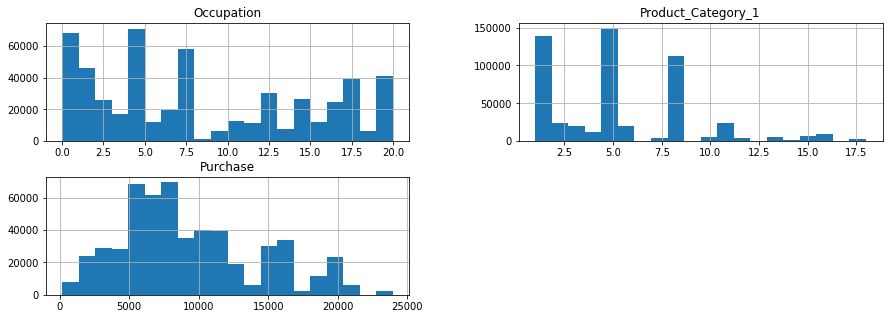

In [0]:
_ = df.hist(column=['Occupation','Product_Category_1', 'Purchase'],bins = 20, figsize=(15,5))

Se puede notar una concentración para la ocupación y categoría del producto para pocos *labels*. Por otra parte para las compras se ve que existe un rango de estas en que se distribuye una gran cantidad, entre  $5.000 y 9.000. Esto desde ya nos hace tener la idea de que pueden existir *outliers*, posiblemente respecto a compras muy caras.

* Conteo hombres y mujeres únicos en los registros.

In [0]:
print(df.groupby(["Gender"]).User_ID.nunique())

Gender
F    1666
M    4225
Name: User_ID, dtype: int64


Notamos que existe una cantidad mucho mayor de población masculina, siendo casi 3 veces la población femenina. Se debe tomar en cuenta también que es esto solo nos dice los clientes únicos, sin embargo es posible que uno tenga muchas más compras que otro.


Ahora bien junto a este análisis, procedemos a ver el comportamiento de las compras respecto a la edad y género.

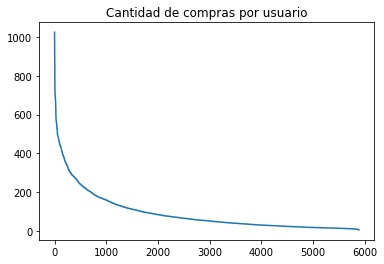

In [12]:
plt.title("Cantidad de compras por usuario")
_= plt.plot(df['User_ID'].value_counts().values)

Podemos rescatar que existe una concentración de usuarios que realizaron más de 200 compras cada uno. Ahora bien veremos el promedio de compras analizando las edades más el género.

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64


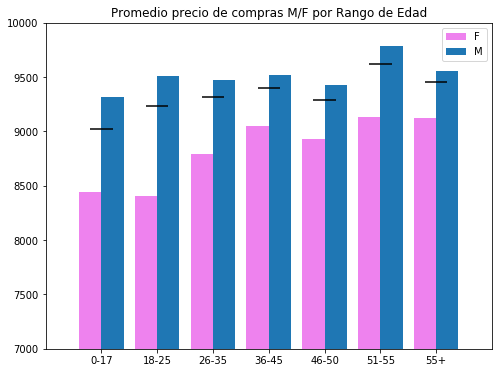

In [0]:
W = df.groupby(["Age"]).mean()['Purchase']
print(W)
X = df.groupby(["Age"]).mean()['Purchase'].index.values
Y = df[df.Gender == 'F'].groupby(["Age","Gender"]).mean()['Purchase']
Z = df[df.Gender == 'M'].groupby(["Age","Gender"]).mean()['Purchase']

_X = np.arange(len(X))
plt.figure(num=None, figsize=(8, 6))
plt.title("Promedio precio de compras M/F por Rango de Edad")
_ =plt.bar(_X - 0.2, Y, 0.4, label = 'F' ,color='violet')
_ =plt.bar(_X + 0.2 , Z, 0.4, label = 'M')
_= plt.axis([-1,7,7000,10000])
_ =plt.legend(loc='best')
_ = plt.hlines(W.values,np.arange(10) - 0.2,np.arange(10) + 0.2)
_ =plt.xticks(_X, X) # set labels manually

A pesar de lo que se podría creer, las poblaciones mayores poseen un promedio más alto en las compras. Además los articulos adquiridos por los hombres son en promedio más caros respecto a los obtenidos por las mujeres, independiente de la edad.

## 1.b Columnas descartadas

Se debe decidir que columnas serán descartadas para lograr realizar una regresión más adecuada. Para ello primero se verán los valores posibles de las columnas, su tipo y cantidad.

In [0]:
pd.DataFrame({'Tipo':df.dtypes.values,'Valores únicos':[df[col].unique() for col in df.columns], 'Total':[len(df[col].unique()) for col in df.columns]}, index = df.columns )

,Tipo,Valores únicos,Total
User_ID,int64,"[1000001, 1000002, 1000003, 1000004, 1000005, ...",5891
Product_ID,object,"[P00069042, P00248942, P00087842, P00085442, P...",3623
Gender,object,"[F, M]",2
Age,object,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]",7
Occupation,int64,"[10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,...",21
City_Category,object,"[A, C, B]",3
Stay_In_Current_City_Years,object,"[2, 4+, 3, 1, 0]",5
Marital_Status,int64,"[0, 1]",2
Product_Category_1,int64,"[3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 1...",18
Product_Category_2,float64,"[nan, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5...",18


De lo anterior podemos ver que:

* *User_ID* y *Product_ID* resultarían problemáticos para realizar la regresión dado que son valores respectivos a indices, por lo cual sirven para *indexar*  pero no para tener relaciones con otros atributos. Además que no es de interés para nuestro análisis ver casos de clientes por separado.
* Las categorías de productos 2 y 3 deben ser eliminadas dada su cantidad de elementos nulos. Además se eliminará la categoría de producto 1 también, ya que se desea hacer regresión lineal y este atributo a pesar de ser númerico es categórico con muchos valores únicos. Por lo cual si se usa tal y como viene en el set, provocaría una mala regresión.
* Se mantendrá la ocupación dado que a pesar de ser categórico contiene pocas categorías.
* La edad y la estadía en la ciudad se consideran ordinales, por ello se mantienen para la regresión. Además que se pueden codificar númericamente débido a la relación entre sus valores posibles.
* El *target* de predicción en próximos pasos se separará de los datos con los que se realizará la combinación lineal.


In [0]:
df = df.drop(columns=['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3']) 

## 1.c Datos Categóricos

Ahora se deben manejar los datos no númericos para poder ser ocupados en la regresión.  Según columna se realizará un tipo distinto de transformación:

* **Gender**: Se utiliza una representación binaria, para lo cual cualquiera de los 2 géneros será representado con un 1 ó 0 para poder ser usado en la regresión. Además tendría consistencia con la codificación del estado marital. Por otra parte dado que cada fila debe tener 1 género, se puede usar solo una columna binaria y no es necesario separar en 2 *dummies*.
* **City_category**: Al ser una variable categórica se decide centrar en 0, sin embargo se podría haber usado *one_hot_encoding*.
* **Age**: Se considera ordinal no númerico, por lo cual cualquier codificación que represente un orden estará bien, tal como "1,2,3,4" para cada rango. Lo importante es que se mantenga la misma distancia entre elementos adyacentes.
* **Stay_In_Current_City_Years**: Al igual que el caso anterior, se transforma a un representación ordinal númerica. Cambiando su último valor único "4+" por "4".
* **Ocupación**: Dado que a pesar de que es un dato númerico, cumple con ser categórico por lo cual podemos codificar cada label a una posición de un arreglo de 1s y 0s.

In [0]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase'],
      dtype='object')

Se generá el mapeo de las variables categóricas a númericas:

In [0]:
#mapeo
mapper = {}
mapper['Gender'] = {'F':1,'M':0}
mapper['City_Category'] =  {'A':-1, 'C':0, 'B':1}
mapper['Age'] =  {'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
mapper['Stay_In_Current_City_Years'] = {'0':0,'1':1,'2':2,'3':3,'4+':4}

In [0]:
for mapp in list(mapper):
  df[mapp] = df[mapp].apply(lambda x: mapper[mapp][x])

data_pre = pd.get_dummies(df.Occupation)
col = list(df.columns)
col.remove('Occupation')
data_pre[col] = df[col]

In [0]:
data_pre

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,2,0,8370
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,2,0,15200
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,2,0,1422
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,2,0,1057
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,0,4,0,7969
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,-1,3,0,15227
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,4,1,2,1,19215
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,4,1,2,1,15854
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,4,1,2,1,15686
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,-1,1,1,7871


In [0]:
data_pre.shape

(537577, 27)

Ahora nuestra data queda solo con valores númericos y con un total de 26 atributos para realizar la regresión.

## 1.d Separación de datos

Como toda técnica de predicción, debemos separar los datos en 3 sets respectivos: entrenamiento (con el cual se realiza el ajuste del modelo), validación (se ve el *score* obtenido por el modelo después de entrenar) y test (set objetivo después de las validaciones).  Se realiza la partición en porcenteajes de 75% 15% y 10% respectivamente para estos conjuntos.

In [0]:
data_pre_train, data_pre_temp = train_test_split(data_pre, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)
y_pre_train = data_pre_train.pop('Purchase').values
y_pre_val = data_pre_val.pop('Purchase').values
y_pre_test = data_pre_test.pop('Purchase').values

In [0]:
size_train = len(y_pre_train)
size_val = len(y_pre_val)
size_test = len(y_pre_test)
size_total = size_train + size_val + size_test

In [0]:
print("Tamaño set de entrenamiento: " + str(size_train) +"| Y su proporción: " + str(size_train/size_total))
print("Tamaño set de validación: " + str(size_val) +"| Y su proporción: " + str(size_val/size_total))
print("Tamaño set de pruebas/test: " + str(size_test) +"| Y su proporción: " + str(size_test/size_total))

Tamaño set de entrenamiento: 403182| Y su proporción: 0.749998604851026
Tamaño set de validación: 80637| Y su proporción: 0.15000083708938441
Tamaño set de pruebas/test: 53758| Y su proporción: 0.1000005580595896


  La librería realiza la separación adecuada de datos.

## 1.e Estandarización

Ahora una buena practica antes de entrenar el modelo, es estandarizar los datos. Dado que reduce la media a 0 y la desviación estandar a 1 para cada columna. En otras palabras, se desea poner los datos en la misma escala sin embargo esto no asegura mejorar los resultados. Por otra parte no es necesario estandarizar los datos de target dado que solo se estaría comparando con los mismos datos y la operación del calculo de la regresión lineal no se vería afectada.

$$ \hat{x_i} = \frac{x_i - {\mu_i}}{\sigma_i} $$

In [0]:
scaler_x = StandardScaler()
scaler_x.fit(data_pre_train)
scaler_y = StandardScaler()
scaler_y.fit(y_pre_train.reshape(-1, 1))
#scaler_x.transform(data_pre_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#escalamiento para cada set
x_train = scaler_x.transform(data_pre_train)
x_val = scaler_x.transform(data_pre_val)
x_test = scaler_x.transform(data_pre_test)

y_train = scaler_y.transform(y_pre_train.reshape(-1, 1))
y_val = scaler_y.transform(y_pre_val.reshape(-1, 1))
y_test = scaler_y.transform(y_pre_test.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by 

In [0]:
print("Primera fila no-estandarizada: " )
print(data_pre_train.values)
print("===========================")
print("Primera fila estandarizada: " )
print(x_train)

Primera fila no-estandarizada: 
[[ 1  0  0 ...  1  1  0]
 [ 0  0  0 ... -1  0  0]
 [ 0  0  0 ... -1  1  1]
 ...
 [ 1  0  0 ...  1  3  0]
 [ 0  0  0 ... -1  1  0]
 [ 0  0  0 ...  0  1  1]]
Primera fila estandarizada: 
[[ 2.62733612 -0.30520907 -0.22530058 ...  1.037258   -0.66682372
  -0.83153778]
 [-0.38061365 -0.30520907 -0.22530058 ... -1.41085474 -1.44243617
  -0.83153778]
 [-0.38061365 -0.30520907 -0.22530058 ... -1.41085474 -0.66682372
   1.20259117]
 ...
 [ 2.62733612 -0.30520907 -0.22530058 ...  1.037258    0.88440119
  -0.83153778]
 [-0.38061365 -0.30520907 -0.22530058 ... -1.41085474 -0.66682372
  -0.83153778]
 [-0.38061365 -0.30520907 -0.22530058 ... -0.18679837 -0.66682372
   1.20259117]]


Notamos que para las columnas *dummies* quizás hubiera sido una decisión acertada dejarlas fuera de la estandarización dada su naturaleza binaria. 

In [0]:
print("Medias por atributo: ")
scaler_x.mean_

Medias por atributo: 


array([0.12653591, 0.08521462, 0.04830821, 0.03261802, 0.13226285,
       0.0221364 , 0.03675511, 0.10722949, 0.00282503, 0.01136459,
       0.0235576 , 0.02111701, 0.05643853, 0.01389199, 0.04967484,
       0.0219479 , 0.04635128, 0.07269174, 0.01212108, 0.01547936,
       0.06147844, 0.24554668, 2.49262864, 0.15260602, 1.85973828,
       0.40879305])

In [0]:
print("Variación por atributo: ")
scaler_x.var_

Variación por atributo: 


array([0.11052457, 0.07795309, 0.04597453, 0.03155409, 0.11476939,
       0.02164638, 0.03540417, 0.09573133, 0.00281705, 0.01123544,
       0.02300264, 0.02067109, 0.05325322, 0.013699  , 0.04720725,
       0.02146619, 0.04420283, 0.06740765, 0.01197416, 0.01523975,
       0.05769884, 0.18525351, 1.82749129, 0.66741684, 1.66230402,
       0.24168129])

## 1.f Primera Regresión

Obtenemos el coeficiente $R^2$ respecto a la predicción, compararemos con los datos escalados y no escalados. Este coeficiente se calcula como: $$ R^2 = 1-  \frac{\sum(\hat{Y_t}-Y_t)^2}{\sum(\bar{Y}-Y_t)^2} $$

Este coeficiente permite medir que tan cercanos están los puntos a la regresión, también puede ser explicado como: $R^2$ =  Variación explicada por el modelo / Variación total. Se procederá a comparar con los datos estandarizados contra su versión original.

* **Datos estandarizados:**

In [0]:
def linear_reg(X,y):
  reg_scaled = LinearRegression()
  reg_scaled.fit(X,y)
  return reg_scaled
model = linear_reg(x_train, y_train)
print("Score obtenido con datos de entrenamiento: %.5f"%model.score(x_train,y_train))
print("Score obtenido con datos de validación: %.5f"%model.score(x_val,y_val))
print("Score obtenido con datos de prueba: %.5f"%model.score(x_test,y_test))

Score obtenido con datos de entrenamiento: 0.00681
Score obtenido con datos de validación: 0.00615
Score obtenido con datos de prueba: 0.00709


Se prueba con el *target* **no estandarizado:**

In [0]:
model = linear_reg(x_train, y_pre_train)
print("Score obtenido con datos de entrenamiento: %.5f"%model.score(x_train,y_pre_train))
print("Score obtenido con datos de validación: %.5f"%model.score(x_val,y_pre_val))
print("Score obtenido con datos de prueba: %.5f"%model.score(x_test,y_pre_test))

Score obtenido con datos de entrenamiento: 0.00681
Score obtenido con datos de validación: 0.00615
Score obtenido con datos de prueba: 0.00709


Y se corrobora que no es necesario realizar esta estandarización dado que no afectará el calculo de los parámetros de la regresión.

* **Datos no-estandarizados:**

In [0]:
model = linear_reg(data_pre_train.values, y_pre_train)
print("Score obtenido con datos de entrenamiento: %.5f"%model.score(data_pre_train.values,y_pre_train))
print("Score obtenido con datos de validación: %.5f"%model.score(data_pre_val,y_pre_val))
print("Score obtenido con datos de prueba: %.5f"%model.score(data_pre_test,y_pre_test))

Score obtenido con datos de entrenamiento: 0.00681
Score obtenido con datos de validación: 0.00617
Score obtenido con datos de prueba: 0.00709


Se prueba con el *target* **estandarizado:**

In [0]:
model = linear_reg(data_pre_train, y_train)
print("Score obtenido con datos de entrenamiento: %.5f"%model.score(data_pre_train,y_train))
print("Score obtenido con datos de validación: %.5f"%model.score(data_pre_val,y_val))
print("Score obtenido con datos de prueba: %.5f"%model.score(data_pre_test,y_test))

Score obtenido con datos de entrenamiento: 0.00681
Score obtenido con datos de validación: 0.00617
Score obtenido con datos de prueba: 0.00709


De esto se destaca la cercanía de los valores obtenidos con la regresión lineal tanto con valores estandarizado como no. En los cuales la validación se mantiene cercana a 0 para los modelos en general.

## 1.g Transformaciones simples

Ahora probaremos realizar transformaciones al espacio del *output*, primero tenemos que ver el comportamiento respecto a su distribución. Para lo cual se graficarán los precios de compras desde menor a mayor.

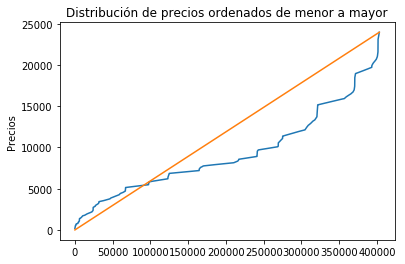

In [0]:
sorted_y_pre_train = np.sort(y_pre_train)
scalar_space = np.arange(0,sorted_y_pre_train.shape[0],1)
plt.title("Distribución de precios ordenados de menor a mayor")
#plt.xlabel("")
plt.ylabel("Precios")
_ = plt.plot(scalar_space, sorted_y_pre_train, scalar_space,np.linspace(0,((sorted_y_pre_train)).max(),num=sorted_y_pre_train.shape[0]))

Donde claramente se ve un comportamiento no lineal respecto al *target*, lo cual vuelve interesante aplicar transformaciones.

* **Transformación raíz cuadrada**

Se prueba una transformación simple llevando a la raíz cuadrada todos los valores de compra.


In [0]:
sorted_y_pre_train_sqrt = np.sqrt(sorted_y_pre_train)

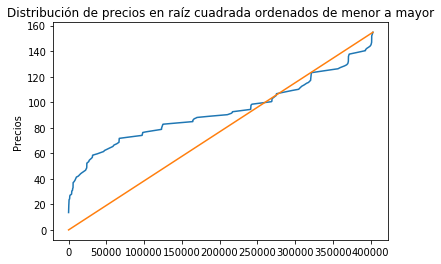

In [0]:
plt.title("Distribución de precios en raíz cuadrada ordenados de menor a mayor")
#plt.xlabel("")
plt.ylabel("Precios")
_ = plt.plot(scalar_space, sorted_y_pre_train_sqrt, scalar_space,np.linspace(0,((sorted_y_pre_train_sqrt)).max(),num=sorted_y_pre_train_sqrt.shape[0]))

Se nota cierta linealidad lograda en precios después de cierto punto, sin embargo mantiene una naturaleza no lineal todavía,

* **Transformación logarítmica**


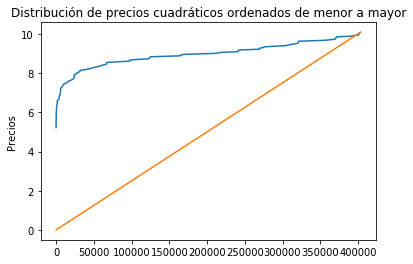

In [0]:
sorted_y_pre_train_log = np.log(sorted_y_pre_train)
plt.title("Distribución de precios cuadráticos ordenados de menor a mayor")
#plt.xlabel("")
plt.ylabel("Precios")
_ = plt.plot(scalar_space, sorted_y_pre_train_log, scalar_space,np.linspace(0,((sorted_y_pre_train_log)).max(),num=sorted_y_pre_train_log.shape[0]))

## 1.h 10-*fold* sobre la potencia

Se realizará un 10-*fold* para probar independiente de la partición de los datos cada transformación en el set y de esta manera analizar cual entrega mejores resultados. Notar que lo realizaremos sobre el data set de entrenamiento, pero esto puede y se suele realizar sobre el dataset de entrenamiento junto al de validación, siendo la partición que varía la correspondiente a la última. Se realizarán 20 transformaciones sobre los *target*, elevando por una potencia distinta cada vez. Para cada transformación se obtendrá el promedio del estimador $R^2$  y del *MAE* o *Absolute Mean Error*.

In [0]:
folds = KFold(10)
scores  = np.zeros([20,10])
MAE  = np.zeros([20,10])
N = 0
for i in range(1,21):
  j = 0
  for train_index, val_index in folds.split(data_pre_train.values):
    if N == 0:
      N = len(val_index)
    #scaler...
    y_i = y_pre_train**(i/10)
    y_train_i = y_i[train_index]
    x_train_fold = data_pre_train.values[train_index]
    y_val_i = y_i[val_index]
    x_val_fold = data_pre_train.values[val_index]
    #model
    model = linear_reg(x_train_fold, y_train_i)
    scores[i-1][j] = model.score(x_val_fold,y_val_i)
    y_pred = model.predict(x_val_fold)
    MAE[i-1][j] = np.sum([abs(y_pred[k]**(10/i) - y_val_i[k]**(10/i)) for k in range(N-1) ])/N
    j+=1

      
      

* *Score* $R^2$

Se analiza el puntaje obtenido por este estimador:

 La mejor transformación se da con i= 11


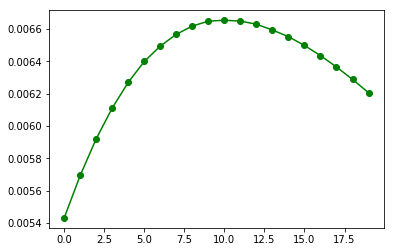

In [0]:
scores_mean = np.mean(scores,axis = 1)
#for i in range(21):
#  print("Promedio de score R^2 obtenido con i igual a " + str(i+1) + " es: %.4f"%(scores_mean[i]) )
plt.plot(scores_mean, 'go-')
result = np.where(scores_mean == np.amax(scores_mean))
print(" La mejor transformación se da con i= %.0f"%(result[0]+1) )

* **Mean Absolute Error**

Se compara el promedio de todos los MAE de cada *fold*, el cual se calcula como: $$ \frac{1}{n} \sum |\hat{y}-y|. $$


 La mejor transformación se da con i= 2


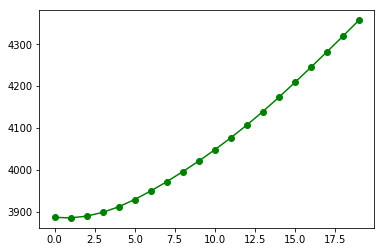

In [0]:

MAE_mean = np.mean(MAE,axis = 1)
#for i in range(21):
#  print("Promedio de score R^2 obtenido con i igual a " + str(i+1) + " es: %.4f"%(scores_mean[i]) )
#f, axs = plt.subplots(1, 2, sharey=False)
#axs[0].plot(MAE_mean, 'go-')
#axs[1].plot(MAE_mean[0:15], 'go-')
plt.plot(MAE_mean, 'go-')
result = np.where(MAE_mean == np.amin(MAE_mean))
print(" La mejor transformación se da con i= %.0f"%(result[0]+1) )

* Modelo entrenado

Se procede a entrenar con el mejor valor que recomienda el estimador *MAE*.

In [0]:
y_i = y_pre_train**(2/10)
y_i_val = y_pre_val**(2/10)
y_i_test = y_pre_test**(2/10)
linear_reg(data_pre_train, y_i)
print("Score obtenido con datos de entrenamiento: " + str(model.score(data_pre_train,y_i)))
print("Score obtenido con datos de validación: " + str(model.score(data_pre_val,y_i_val)))
print("Score obtenido con datos de prueba: " + str(model.score(data_pre_test,y_i_test)))

Score obtenido con datos de entrenamiento: -2.3384607779615444e+16
Score obtenido con datos de validación: -2.333439677021737e+16
Score obtenido con datos de prueba: -2.3150002091681164e+16


Entregando peores resultados, podemos notar que no se puede depender de un solo estimador para la elección de alternativas respecto al modelo.

## 1.i Q-Q plot

Este gráfico nos permite comparar que tan cerca están la distribución de 2 conjuntos de datos. Es por ello que resulta interesante comparar la distribución de los residuos, con la normal.  

((array([-4.29855253, -4.09768627, -3.9883572 , ...,  3.9883572 ,
          4.09768627,  4.29855253]),
  array([-15506.19925642, -15406.26972003, -15399.19925642, ...,
           9751.50127103,   9819.69054098,  10039.42121997])),
 (4851.295170189835, 1.2278003020936668, 0.9772668101243793))

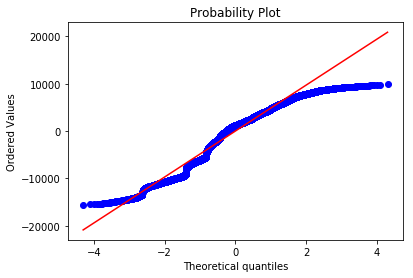

In [0]:
from scipy import stats
model = linear_reg(data_pre_train, y_pre_train)
err = model.predict(data_pre_val) - y_pre_val
stats.probplot(err ,dist='norm', plot=plt)


Se puede ver que la distribución de los errores dista de ser normal, especialmente para los valores en los extremos. Una de las razones sea probablemente los *outliers*, los cuales afectan de gran manera a la regresión lineal.

## 1.j Variables categóricas

Finalmente probamos usando el modelo sobre todas las columnas, es decir para las variables categóricas no binarias usaremos el encoding dado por *get_dummies*. También se verá el caso de usar este representación para el atributo *city_category*, una de las ventajas respecto a la codificación anterior viene respecto a que se podrán generar nuevas relaciones al separarse en distintas columnas.

In [0]:
df = pd.read_csv("gdrive/My Drive/2019-1/ML/Pregunta 1/BlackFriday.csv")
df = df.drop(columns = ['User_ID','Product_ID'])
mapper = {}
mapper['Gender'] = {'F':1,'M':0}
mapper['Age'] =  {'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
mapper['Stay_In_Current_City_Years'] = {'0':0,'1':1,'2':2,'3':3,'4+':4}

In [0]:
for mapp in list(mapper):
  df[mapp] = df[mapp].apply(lambda x: mapper[mapp][x])

categorical_cols = ['Occupation','City_Category','Product_Category_1','Product_Category_2','Product_Category_3']
for cat in categorical_cols:
  print(cat)
  data_pre = pd.get_dummies(df[cat])
  df = df.drop(columns = [cat])
  df = pd.concat([df, data_pre], axis=1)

Occupation
City_Category
Product_Category_1
Product_Category_2
Product_Category_3


In [0]:
df.head()

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Purchase,0,1,2,3,4,...,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
0,1,0,2,0,8370,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,15200,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,2,0,1422,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,2,0,1057,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6,4,0,7969,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Separación de datos

In [0]:
data_pre_train, data_pre_temp = train_test_split(df, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)
y_pre_train = data_pre_train.pop('Purchase').values
y_pre_val = data_pre_val.pop('Purchase').values
y_pre_test = data_pre_test.pop('Purchase').values

In [0]:
model = linear_reg(data_pre_train, y_pre_train)
print("Score obtenido con datos de entrenamiento: %.5f"%model.score(data_pre_train.values,y_pre_train))
print("Score obtenido con datos de validación: %.5f"%model.score(data_pre_val,y_pre_val))
print("Score obtenido con datos de prueba: %.5f"%model.score(data_pre_test,y_pre_test))

Score obtenido con datos de entrenamiento: 0.63950
Score obtenido con datos de validación: 0.63597
Score obtenido con datos de prueba: 0.64028


Donde se obtiene un *score*  $R^2$ mucho mejores respecto a los resultados previos. Sin embargo el costo en memoria fue mucho mayor, al tener que computar una matriz *sparse* de mayor dimensionalidad.

# Conclusión parte 1

En esta primera parte del trabajo se uso la regresión lineal como método de predicción de valores de compra, el *dataset* presentó ser útil para esto. Pudiendo realizar distintas decisiones de pre-procesado como también de transformaciones al mismo *output*. Dentro del aprendizaje principal viene a estar la preparación e interpretación de los datos respecto al modelo predictivo que se esta usando. En el caso de la regresión lineal la separación de los datos o magnitudes muy distintas entre atributos conlleva resultados distintosal contrario de usar una estandarización de los atributos. Por otra parte el *encoding* de las variables categóricas puede afectar el *score* final obtenido. Se puede considerar la regresión lineal como uno de los modelos más fácil de implementar e interpretar, a la vez que presenta ser ventajoso como primer acercamiento dado su barato costo computacional.